# Simulating Soccer Matches

In this notebook, you will near to simulate soccer matches using the Poisson distribution. This is a very simple, model but shows how simple generative models can simulate real word situations.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Model

Here is the basic model we are going to work with:

* There are two teams (1 and 2) that are going to meet in the finals of the world cup.
* All we know about those teams is the average number of goals that have scored in each past game.
* You are going to model the number of goals they score per game using a Poisson distribution.
* By drawing samples from the appropriate Poisson distribution for each team, you will simulate the point spread.
* Using the point spread, you will calculate the probability of each team winning or a tie.

Here are the parameters of the model:

In [2]:
t1_avg = 3 # team 1 average goals per game
t2_avg = 2 # team 2 average goals per game
n = 500    # number of simulated games

Simulate `n` games for each team using a Poisson distribution $Pois(\lambda)$ with $\lambda$ chosen appropriately for the team. Store the number of goals for each team in a NumPy array named `sim1` and `sim2`:

In [3]:
np.random.seed(0) # keep this line to reset the random number generator
# YOUR CODE HERE
sim1 = np.random.poisson(t1_avg, n)
sim2 = np.random.poisson(t2_avg, n)

In [4]:
assert len(sim1)==n
assert len(sim2)==n
assert sim1.dtype==np.dtype(int)
assert sim2.dtype==np.dtype(int)
assert np.abs(sim1.mean()-t1_avg) < 0.05
assert np.abs(sim2.mean()-t2_avg) < 0.05

Calculate an array of point spreads ($Team_2-Team_1$) for the `n` games. Save your array as the variable `spread`.

In [5]:
# YOUR CODE HERE
spread = sim2 - sim1

In [6]:
assert len(spread)==n
assert spread.dtype==np.dtype(int)
assert np.allclose(spread,np.subtract(sim2, sim1))

Visualize the point spread by making a histogram using Matplotlib. Label your axes, use a grid and customize the bins so that each bin shows a particular integer valued point spread.

In [18]:
spread.min()

-10

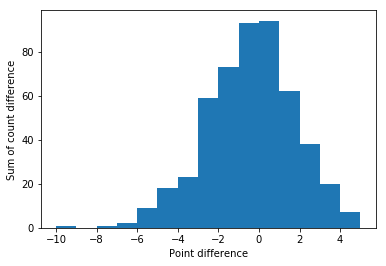

In [26]:
# YOUR CODE HERE
num_bins = (spread.min()*-1) + spread.max()
plt.hist(spread, bins=num_bins);
plt.xlabel('Point difference')
plt.ylabel('Sum of count difference')

Use the array of simulated point spreads to calculate the probabilities that each team will win or reach a tie. Print these probabilities, along with the team numbers.

In [47]:
# YOUR CODE HERE
t1_win = 0
t2_win = 0
tie = 0

for score in spread:
    if score < 0:
        t1_win += 1
    elif score > 0:
        t2_win += 1
    else:
        tie += 1
        
t1_percent = (t1_win / n) * 100
t2_percent = (t2_win / n) * 100
tie_percent = (tie / n) * 100
print("Odds of team 1 winning: " + str(t1_percent) + "%")
print("Odds of team 2 winning: " + str(t2_percent) + "%")
print("Odds of a tie: " + str(tie_percent) + "%")

Odds of team 1 winning: 55.800000000000004%
Odds of team 2 winning: 25.4%
Odds of a tie: 18.8%
